<a href="https://colab.research.google.com/github/AhmedMakboul/Clinical-Note-Classification/blob/main/Nlu_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements **(Packages/Access)**

In [ ]:

!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `last_lora` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticat

In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
!pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
pip install transformers datasets peft


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


#### **Loading Dataset & preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/mtsamples.csv')

import pandas as pd

top_5_labels = df['medical_specialty'].value_counts().nlargest(5).index
filtered_df = df[df['medical_specialty'].isin(top_5_labels)].sample(frac=1, random_state=42).reset_index(drop=True)


filtered_df =  filtered_df[['transcription', 'medical_specialty']]


In [ ]:
filtered_df.isna().sum()

,0
transcription,16
medical_specialty,0


In [ ]:
filtered_df = filtered_df.dropna()

In [ ]:
# Separate the text and labels
texts = filtered_df['transcription'].values
labels = filtered_df['medical_specialty'].values


In [ ]:
print(len(texts),len(labels))

2603 2603


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
print(len(encoded_labels))

2603


**Dataset Handling (Tokenization )**

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments, Trainer, DataCollatorForLanguageModeling
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training


In [ ]:
# Ensure that 'texts' is a list of strings
from transformers import AutoTokenizer

texts = filtered_df['transcription'].astype(str).tolist()

model_name =  "TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0"


# Load tokenizer and model with quantization config
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer.pad_token = tokenizer.eos_token

# Tokenize the text data
encoding = tokenizer(texts, truncation=True, padding=True, max_length=512)

# Check the tokenized input
print(encoding['input_ids'][:2])  # Print the first two tokenized inputs


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[[1, 5195, 29909, 3094, 15842, 478, 3235, 1806, 29901, 1919, 450, 16500, 338, 263, 29871, 29955, 29946, 29899, 6360, 29899, 1025, 6114, 1058, 22981, 363, 452, 2192, 1188, 936, 8799, 362, 12992, 491, 4942, 29889, 1060, 29889, 29871, 2296, 338, 21302, 304, 278, 28573, 491, 902, 10216, 322, 4208, 896, 2367, 902, 4955, 1696, 29950, 9047, 18929, 8079, 349, 15989, 3919, 306, 2208, 8186, 1799, 29901, 1919, 450, 16500, 338, 263, 12355, 873, 29871, 29955, 29946, 29899, 6360, 29899, 1025, 6114, 1058, 22981, 411, 1950, 16157, 17546, 346, 17206, 375, 29889, 29871, 3951, 728, 338, 902, 7531, 4086, 29892, 541, 1183, 756, 1063, 297, 278, 3303, 3900, 363, 1784, 1784, 2440, 322, 7726, 29879, 1652, 8122, 4223, 29892, 408, 947, 902, 10216, 1696, 3047, 3390, 304, 902, 22049, 322, 17346, 29892, 1183, 5922, 376, 29902, 1348, 306, 6686, 2090, 1460, 1213, 29871, 2439, 10216, 756, 10548, 975, 278, 1833, 4832, 7378, 470, 577, 393, 1183, 756, 2545, 4858, 287, 902, 2967, 322, 4953, 901, 6258, 28605, 297, 902, 494

In [ ]:
# Check the encoded labels
print(encoded_labels[:5])  # Print the first five encoded labels


[1 4 3 2 0]


In [ ]:
print(label_encoder.classes_)  # Print the classes


[' Cardiovascular / Pulmonary' ' Consult - History and Phy.' ' Orthopedic'
 ' Radiology' ' Surgery']


In [ ]:
from sklearn.model_selection import train_test_split

# First, split the dataset into train and temporary (80% train, 20% temp)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

# Then, split the temporary set into validation and test sets (50% validation, 50% test)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenize the train, validation, and test texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

# Check the tokenized inputs
print(f"Train encodings: {train_encodings['input_ids'][:2]}")
print(f"Validation encodings: {val_encodings['input_ids'][:2]}")
print(f"Test encodings: {test_encodings['input_ids'][:2]}")


Train encodings: [[1, 379, 9047, 18929, 5300, 5195, 29909, 3094, 15842, 8707, 29903, 8647, 8098, 29901, 29892, 1152, 17983, 310, 445, 16500, 363, 8104, 23900, 4315, 292, 1696, 29950, 9047, 18929, 8079, 349, 15989, 3919, 306, 2208, 8186, 1799, 29901, 29892, 3237, 29889, 319, 338, 263, 29871, 29945, 29941, 29899, 6360, 29899, 1025, 16615, 1058, 471, 12992, 363, 8104, 23900, 4315, 292, 29889, 29871, 450, 16500, 1497, 393, 540, 23025, 4947, 777, 23819, 380, 8789, 29889, 29871, 5901, 1135, 393, 29892, 727, 526, 694, 916, 16083, 4828, 29889, 1919, 7228, 1254, 341, 3352, 2965, 1964, 379, 9047, 18929, 29901, 29892, 450, 16500, 947, 451, 505, 738, 10676, 16083, 4828, 472, 599, 29889, 29871, 940, 972, 583, 738, 7498, 10700, 2673, 29892, 652, 370, 10778, 29892, 470, 738, 916, 4828, 29889, 29871, 940, 947, 451, 2125, 738, 13589, 800, 1696, 7228, 1254, 317, 4574, 29954, 2965, 1964, 379, 9047, 18929, 29901, 1919, 29903, 2007, 708, 363, 29668, 630, 8281, 284, 4843, 398, 297, 29871, 29896, 29929, 2992

In [ ]:
import torch

class MedicalDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create train and validation datasets
train_dataset = MedicalDataset(train_encodings, train_labels)
val_dataset = MedicalDataset(val_encodings, val_labels)
test_dataset = MedicalDataset(test_encodings, test_labels)


**Training Configuration (Fine-tuning llama with loRA)**

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType

# Define quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",  # or "fp4"
    bnb_4bit_use_double_quant=True,
    llm_int8_threshold=6.0
)

model_name = "TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0"


# Load tokenizer and model with quantization config
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

# Define LoRA configuration
peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

# Apply LoRA
model = get_peft_model(model, peft_config)


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType


In [ ]:
import torch.nn as nn

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model_name, num_labels):
        super().__init__()
        self.base = AutoModelForCausalLM.from_pretrained(base_model_name, device_map="auto")
        self.config = self.base.config
        self.classifier = nn.Linear(self.base.config.hidden_size, num_labels)
        self.num_labels = num_labels

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        outputs = self.base.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            **kwargs
        )
        last_hidden = outputs.last_hidden_state[:, -1, :]  # [B, H]
        logits = self.classifier(last_hidden)

        loss = None
        if labels is not None:
            loss = nn.CrossEntropyLoss()(logits, labels)

        return {"loss": loss, "logits": logits}


In [ ]:
model = LLaMAForSequenceClassification("TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0", num_labels=5)

model = get_peft_model(model, peft_config)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:79: UserWarning: The PEFT config's `base_model_name_or_path` was renamed from 'TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0' to 'None'. Please ensure that the correct base model is loaded when loading this checkpoint.
  warnings.warn(


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=500,
    report_to="none",
    label_names=["labels"]
)

tokenizer.pad_token = tokenizer.eos_token

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)
trainer.train()


<ipython-input-17-4a10b72585eb>:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,1.079900
1000,0.693400
1500,0.526600


TrainOutput(global_step=1572, training_loss=0.7554834040673332, metrics={'train_runtime': 3903.7453, 'train_samples_per_second': 1.61, 'train_steps_per_second': 0.403, 'total_flos': 0.0, 'train_loss': 0.7554834040673332, 'epoch': 3.0})

In [ ]:
trainer.save_model("/content/modelv4")

In [ ]:
!zip -r /content/modelv4.zip /content/modelv4


  adding: content/modelv4/ (stored 0%)
  adding: content/modelv4/adapter_model.safetensors (deflated 8%)
  adding: content/modelv4/training_args.bin (deflated 52%)
  adding: content/modelv4/special_tokens_map.json (deflated 73%)
  adding: content/modelv4/tokenizer.model (deflated 55%)
  adding: content/modelv4/tokenizer.json (deflated 85%)
  adding: content/modelv4/tokenizer_config.json (deflated 68%)
  adding: content/modelv4/adapter_config.json (deflated 57%)
  adding: content/modelv4/README.md (deflated 66%)


In [ ]:
from google.colab import files
files.download('/content/modelv4.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from peft import PeftModel
import torch

# Load base model with correct number of labels
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_with_adapter = LLaMAForSequenceClassification("TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0", num_labels=5)


# Load LoRA adapter weights into base model
model_with_adapter = PeftModel.from_pretrained(model_with_adapter, "./modelv4").to(device)

# Set to evaluation mode
model_with_adapter.eval()


PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): LLaMAForSequenceClassification(
      (base): LlamaForCausalLM(
        (model): LlamaModel(
          (embed_tokens): Embedding(32000, 2048)
          (layers): ModuleList(
            (0-21): 22 x LlamaDecoderLayer(
              (self_attn): LlamaAttention(
                (q_proj): lora.Linear(
                  (base_layer): Linear(in_features=2048, out_features=2048, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.1, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=2048, out_features=8, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=8, out_features=2048, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
                  (lora_embedding_B): ParameterDict()
             

In [ ]:
model_with_adapter.peft_config

{'default': LoraConfig(task_type='SEQ_CLS', peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, inference_mode=True, r=8, target_modules={'q_proj', 'v_proj'}, exclude_modules=None, lora_alpha=16, lora_dropout=0.1, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=['classifier', 'score', 'classifier', 'score', 'classifier', 'score'], init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False)}

**Predicting Sample**

In [ ]:
text = "The patient presents with chest pain and radiating discomfort."

inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

with torch.no_grad():
    outputs = model_with_adapter(**inputs)
    logits = outputs["logits"]
    predicted_class = torch.argmax(logits, dim=1).item()

# Convert back to label if needed
predicted_label = label_encoder.inverse_transform([predicted_class])[0]
print("Predicted Medical Specialty:", predicted_label)


Predicted Medical Specialty:  Cardiovascular / Pulmonary


In [ ]:
!unzip /content/modelv3.zip


Archive:  /content/modelv3.zip
   creating: content/modelv3/
  inflating: content/modelv3/adapter_model.safetensors  
  inflating: content/modelv3/training_args.bin  
  inflating: content/modelv3/special_tokens_map.json  
  inflating: content/modelv3/tokenizer.model  
  inflating: content/modelv3/tokenizer.json  
  inflating: content/modelv3/tokenizer_config.json  
  inflating: content/modelv3/adapter_config.json  
  inflating: content/modelv3/README.md  


**Evaluation**

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score

# Assuming you already have:
# test_dataset = MedicalDataset(test_encodings, test_labels)

test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the base tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/modelv4")



def evaluate_llama(model, loader):
    preds = []
    labels = []
    with torch.no_grad():
        for batch in tqdm(loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['labels'].to(device)



            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs["logits"]
            predicted_class = torch.argmax(logits, dim=1)


            preds.extend(predicted_class.cpu().numpy())
            labels.extend(label.cpu().numpy())

    acc = accuracy_score(labels, preds)
    return acc,labels,preds




In [ ]:
adapter_acc , label , preds = evaluate_llama(model_with_adapter, test_loader)
print(f"\n Accuracy of BASE + ADAPTER model: {adapter_acc * 100:.4f}%")

100%|██████████| 33/33 [01:07<00:00,  2.04s/it]


 Accuracy of BASE + ADAPTER model: 73.5632%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
class_names = label_encoder.classes_
report = classification_report(label, preds, target_names=class_names)
print(report)

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.51      0.55      0.53        40
 Consult - History and Phy.       0.89      0.76      0.82        51
                 Orthopedic       0.57      0.57      0.57        30
                  Radiology       0.73      0.75      0.74        32
                    Surgery       0.81      0.83      0.82       108

                   accuracy                           0.74       261
                  macro avg       0.70      0.69      0.70       261
               weighted avg       0.74      0.74      0.74       261



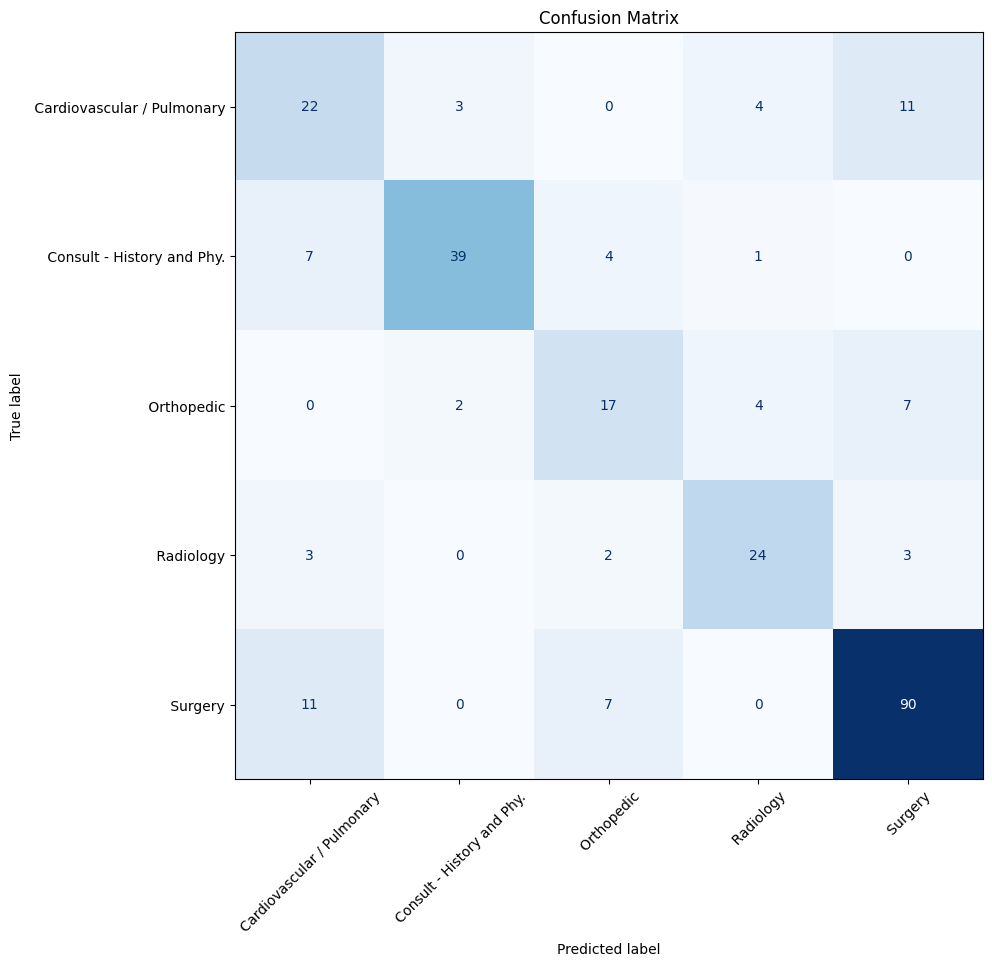

In [ ]:
cm = confusion_matrix(label, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust size as needed
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
model = LLaMAForSequenceClassification("TinyLLaMA/TinyLLaMA-1.1B-Chat-v1.0", num_labels=5)
model.eval()

adapter_acc = evaluate_llama(model, test_loader)
print(f"\n Accuracy of BASE model: {adapter_acc * 100:.4f}%")

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

100%|██████████| 33/33 [1:17:48<00:00, 141.46s/it]


 Accuracy of BASE model: 15.6489%
